<a href="https://colab.research.google.com/github/rlmariz/reconhecimentos-padroes/blob/main/ReconhecimentoPadr%C3%B5es_Lista03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clustering

<br>

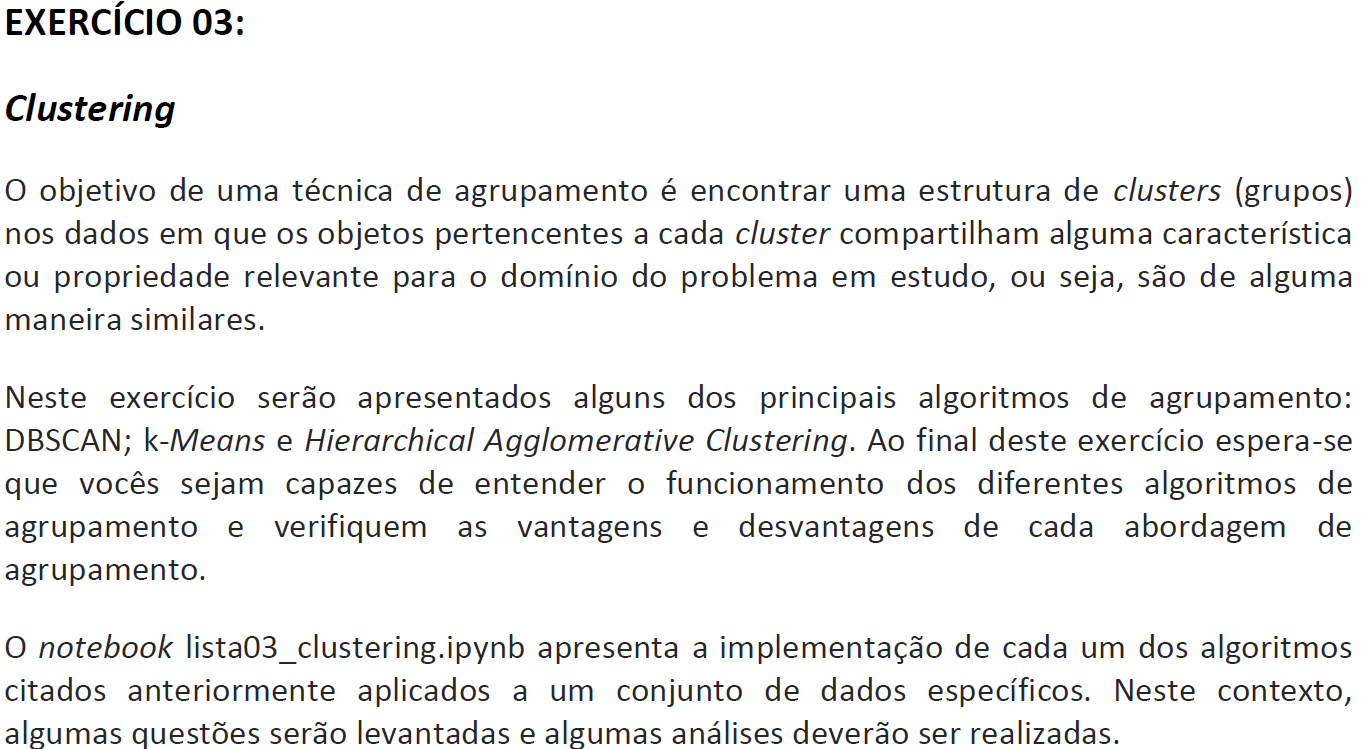

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


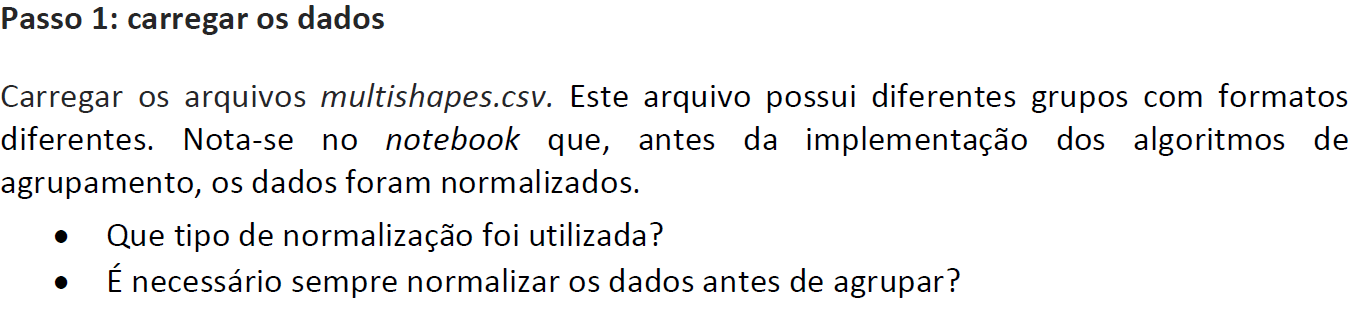

Questão 1: Foi utilizado a função preprocessing.scale() para normalização dos dados, conhecida como normalização z-score, é um processo de transformação dos dados de forma que eles tenham média zero e desvio padrão igual a 1.


Questão 2: Não é sempre necessário normalizar os dados antes de aplicar algoritmos de agrupamento, mas em muitos casos, a normalização pode ser benéfica e melhorar os resultados do agrupamento. No entanto, a necessidade de normalização depende dos dados específicos que você está trabalhando e dos algoritmos de agrupamento que está utilizando.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline

In [3]:
# Carrega dados e apresenta algumas estatícticas
multishapes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reconhecimentos Padrões/Lista-03/multishapes.csv")
ms_df = multishapes[['x','y']]
ms_df.describe()

,x,y
count,1100.000000,1100.000000
mean,-0.081222,-0.625431
std,0.644967,1.176170
min,-1.489180,-3.353462
25%,-0.478839,-1.126752
50%,-0.132920,-0.297040
75%,0.366072,0.250817
max,1.492208,1.253874


In [4]:
# Normalizar os dados
scaled_df = pd.DataFrame(preprocessing.scale(ms_df), index=multishapes['shape'], columns = ms_df.columns)
scaled_df.describe()

,x,y
count,1.100000e+03,1100.000000
mean,4.521636e-17,0.000000
std,1.000455e+00,1.000455
min,-2.183985e+00,-2.320473
25%,-6.167723e-01,-0.426425
50%,-8.019252e-02,0.279331
75%,6.938298e-01,0.745340
max,2.440659e+00,1.598544


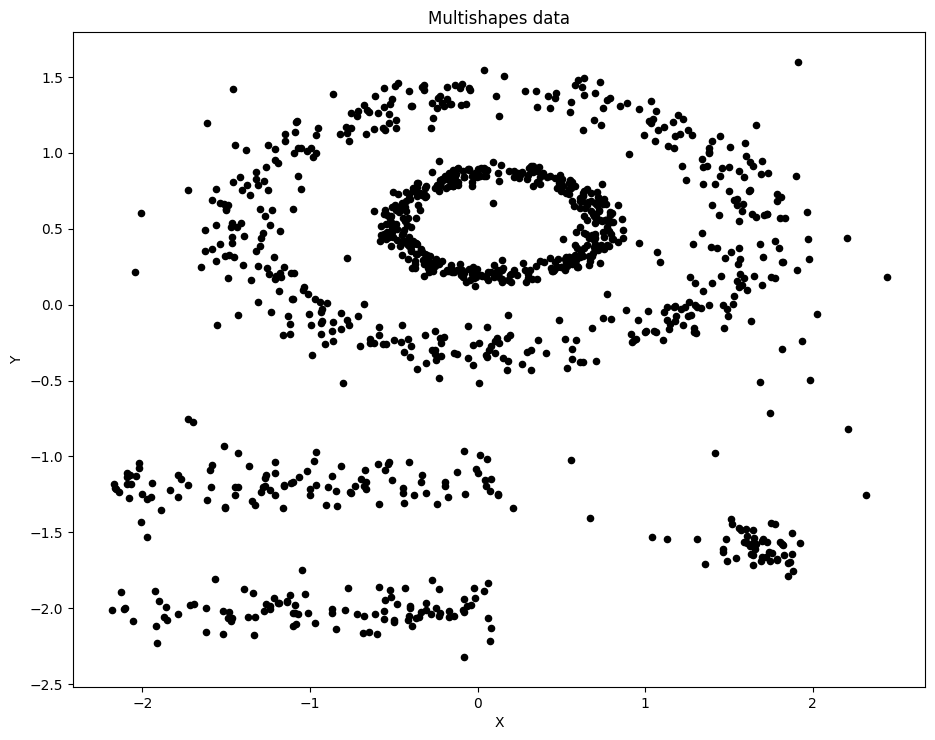

In [5]:
# Plotar os dados
msplot = scaled_df.plot.scatter(x='x',y='y',c='Black',title="Multishapes data",figsize=(11,8.5))
msplot.set_xlabel("X")
msplot.set_ylabel("Y")
plt.show()

## k-Means clustering:

<br>

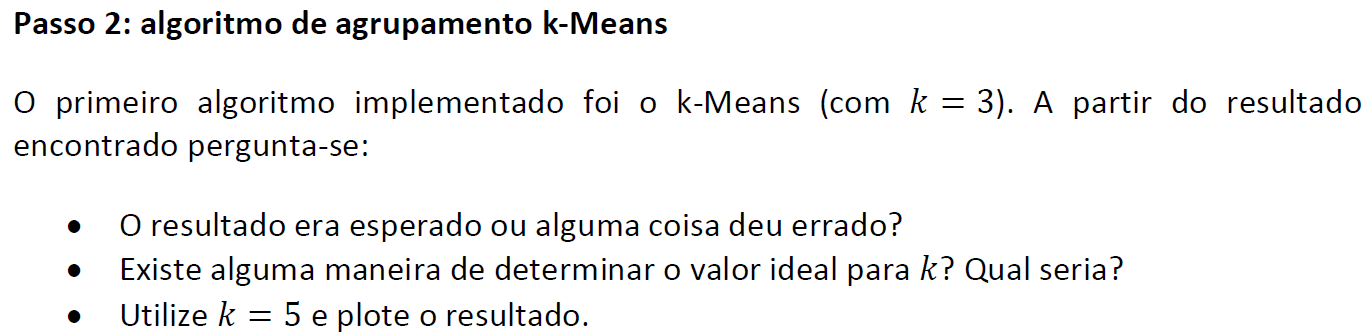

Questão 1: Apesar de ter alguns pontos em vermellho pode se ver que foi feito o agrupamento em 3 grupos o que indica o resultado esperado.

Questão 2: É necessario ajusta de especialista com conhecimento dos dados para determinar o k ideal, porem existem tecnicas que pode ser utilizadas, por exemplo a do cotovelo em que plota-se o número de clusters em relação à soma dos quadrados das distâncias dentro dos clusters (SSE). O objetivo é escolher o valor de k no ponto em que a melhoria na SSE começa a diminuir significativamente, formando um padrão semelhante a um cotovelo no gráfico.

In [6]:
from sklearn.cluster import KMeans
ms_kmeans = KMeans(n_clusters=3, init='random', n_init=3, random_state=109).fit(scaled_df)

### Plotting

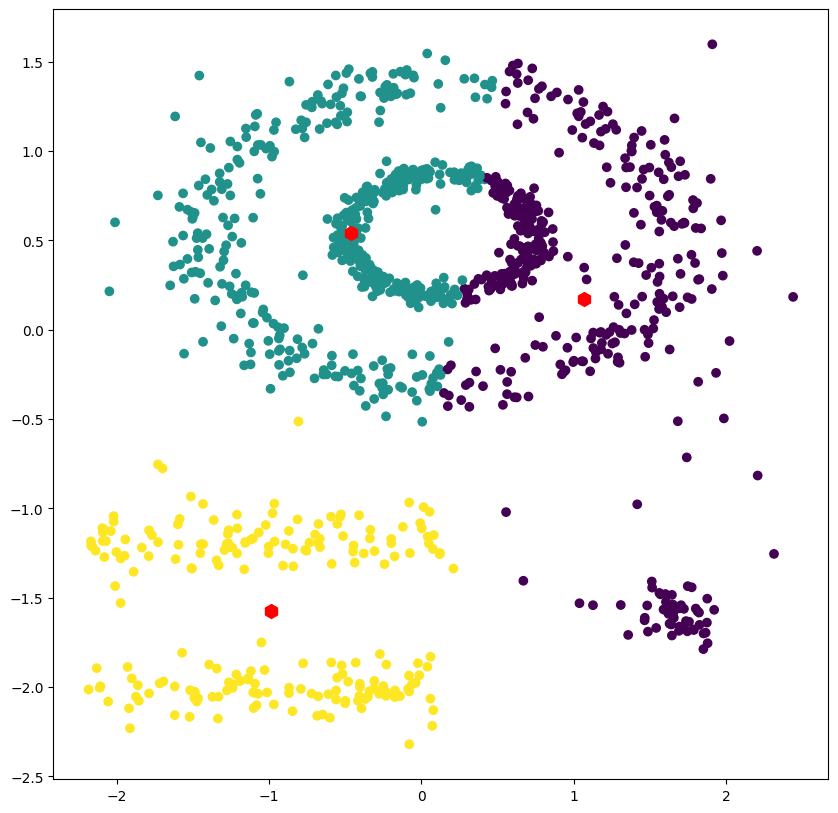

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_df['x'],scaled_df['y'], c=ms_kmeans.labels_);
plt.scatter(ms_kmeans.cluster_centers_[:,0],ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=100);

In [8]:
from sklearn.cluster import KMeans
ms_kmeans_k5 = KMeans(n_clusters=5, init='random', n_init=3, random_state=109).fit(scaled_df)

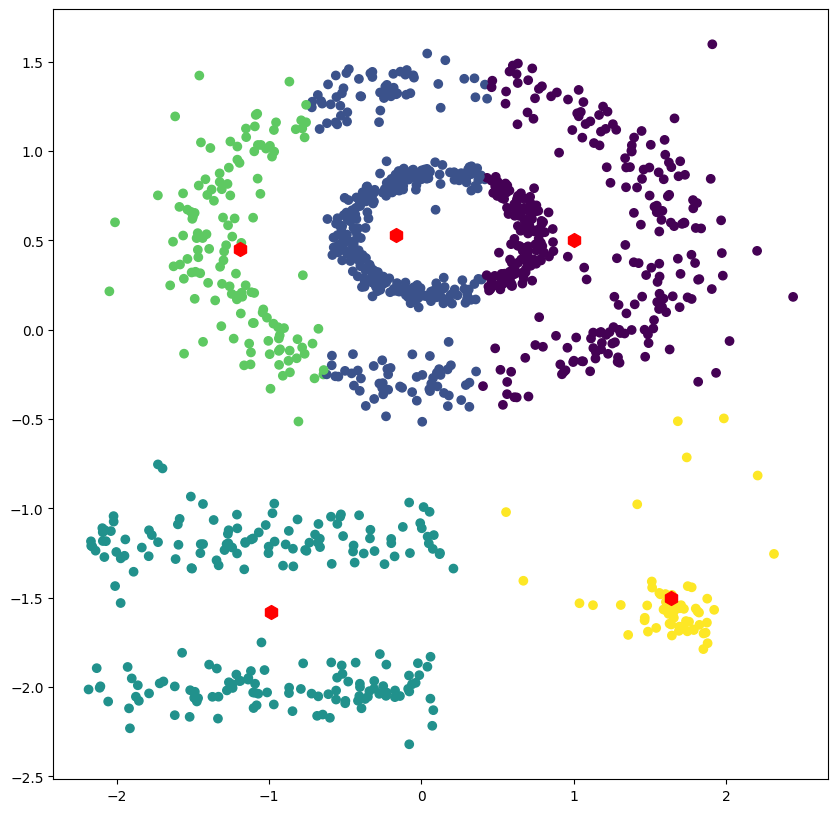

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_df['x'],scaled_df['y'], c=ms_kmeans_k5.labels_);
plt.scatter(ms_kmeans_k5.cluster_centers_[:,0],ms_kmeans_k5.cluster_centers_[:,1], c='r', marker='h', s=100);

### Características:
 - Problema de inicialização; deve ser rodado várias vezes
 - A distância total ao quadrado nunca deve piorar durante uma atualização
 - k-Means pode lutar com clusters que estão próximos; eles podem ser agrupados em um
 - Não há noção de 'não faz parte de nenhum cluster' ou 'parte de dois clusters'
 - [Visualização aqui](http://web.stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)

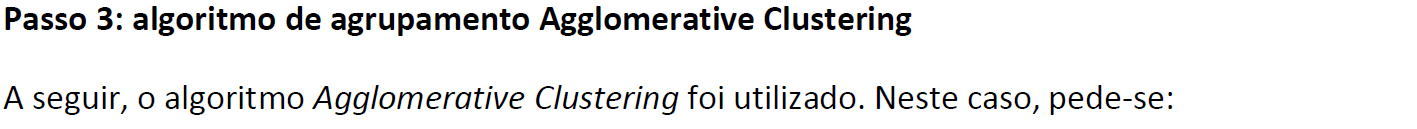

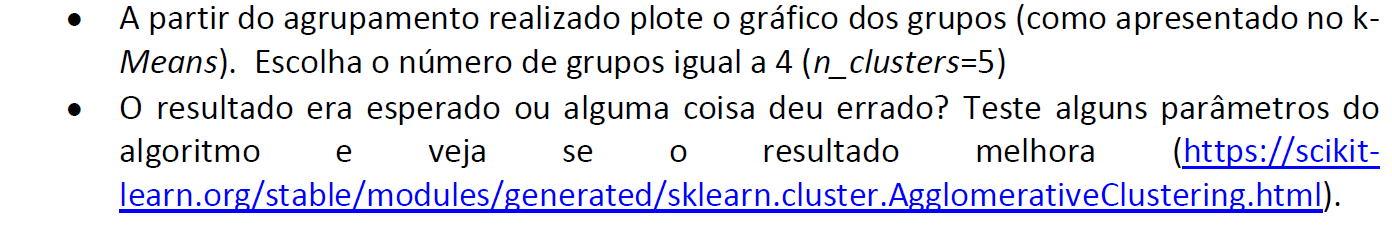

## Agglomerative Clustering

<br>

In [10]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean').fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Plotting

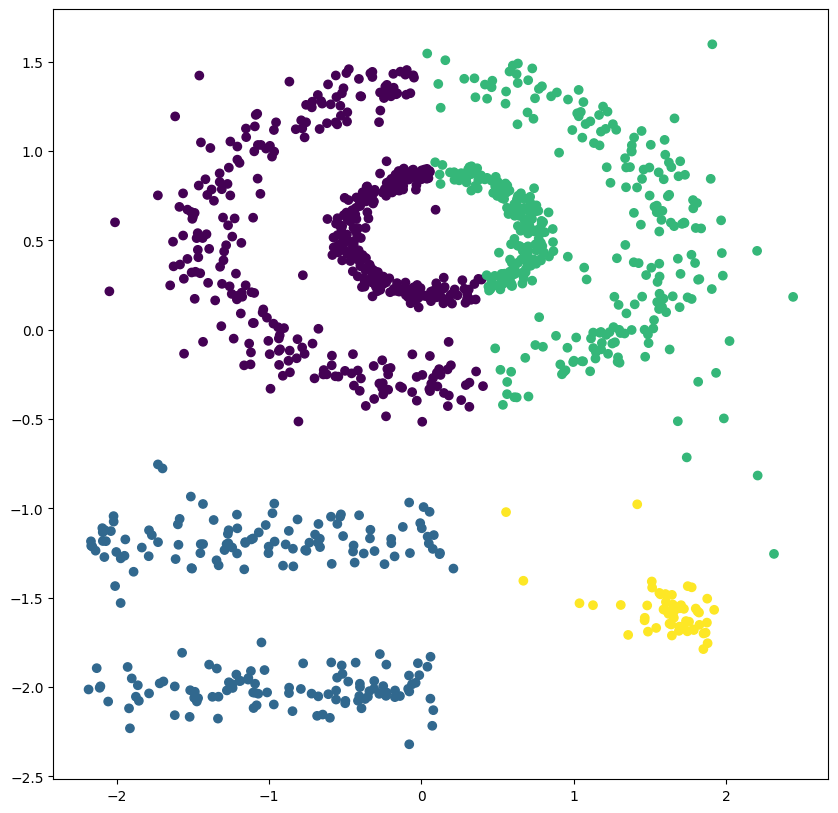

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_df['x'],scaled_df['y'], c=clustering.labels_);
plt.show()

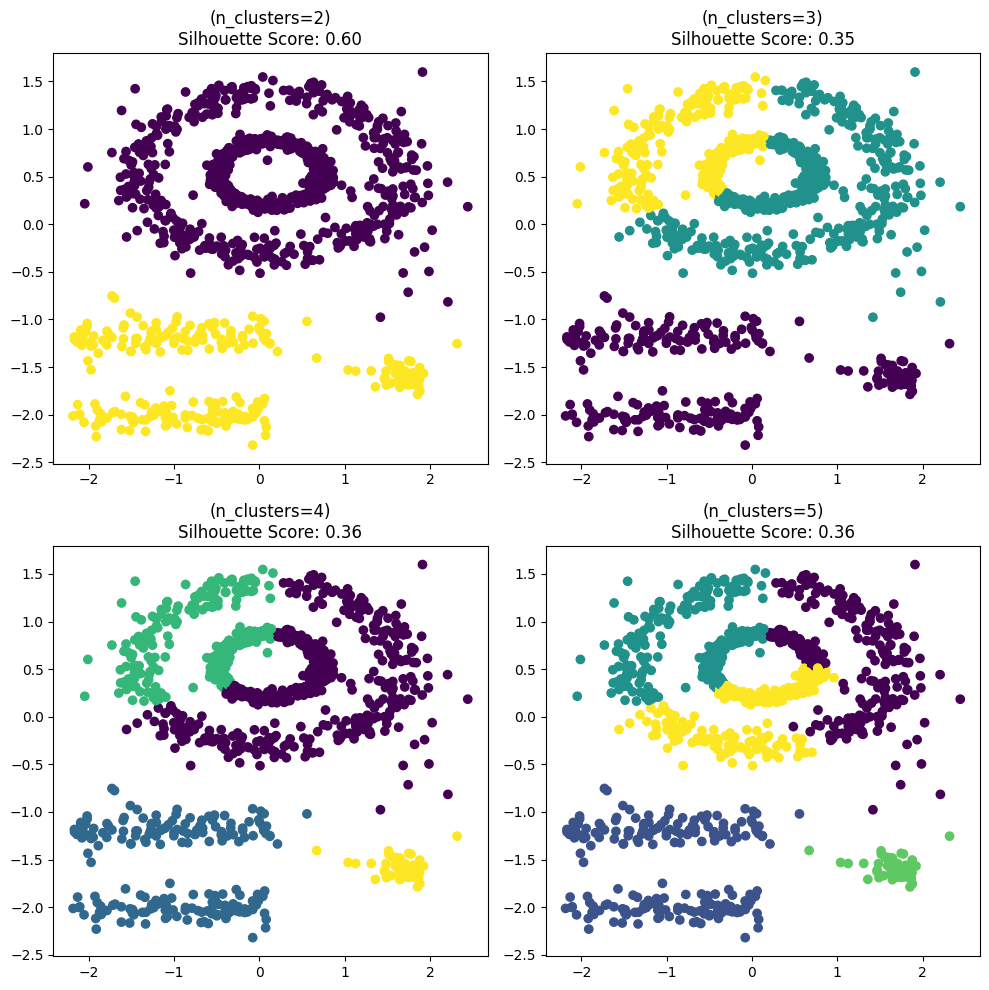

In [12]:
from sklearn.metrics import silhouette_score

# Testar diferentes valores de n_clusters
n_clusters_list = [2, 3, 4, 5]

best_score = -1
best_clusters = None

# Criar a figura com tamanho ajustável
fig = plt.figure(figsize=(10, 10))

for i, n_clusters in enumerate(n_clusters_list):
    # Criar o modelo de agrupamento hierárquico
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')

    # Realizar o agrupamento
    clusters = clustering.fit_predict(ms_df)

    # Calcular a pontuação de Silhouette
    score = silhouette_score(ms_df, clusters)

     # Verificar se a pontuação atual é melhor que a melhor pontuação anterior
    if score > best_score:
        best_score = score
        best_clusters = clusters

    # Plotar o gráfico de dispersão dos clusters
    plt.subplot(2, 2, i+1)
    plt.scatter(scaled_df['x'], scaled_df['y'], c=clusters, cmap='viridis')
    plt.title(f'(n_clusters={n_clusters})\nSilhouette Score: {score:.2f}')

plt.tight_layout()
plt.show()

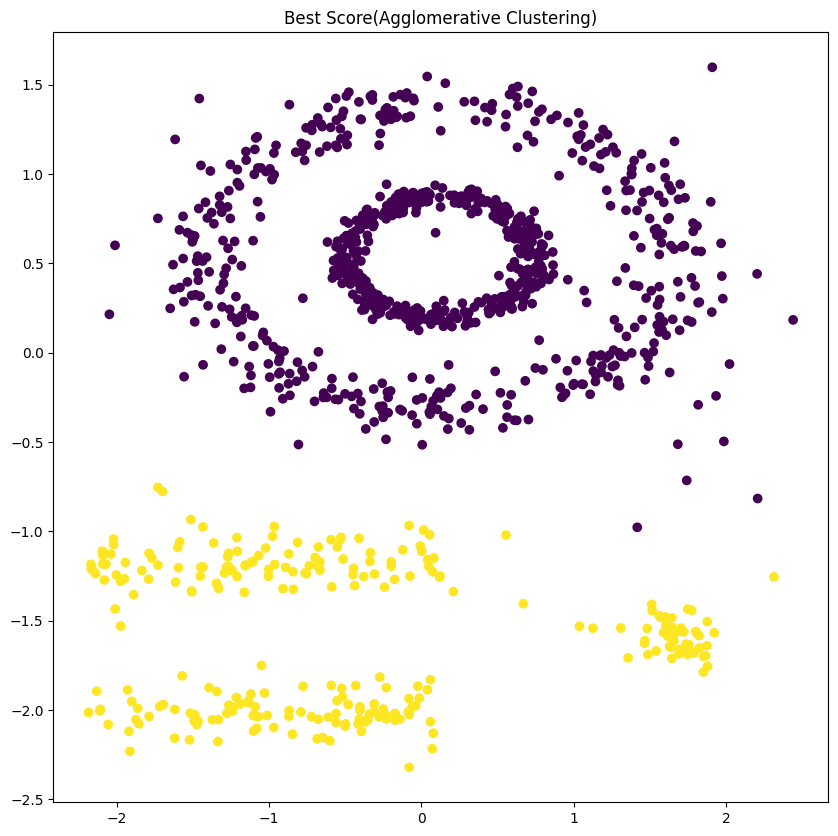

In [13]:
# Criar a figura com tamanho ajustável
fig = plt.figure(figsize=(10, 10))
plt.scatter(scaled_df['x'], scaled_df['y'], c=best_clusters, cmap='viridis')
plt.title('Best Score(Agglomerative Clustering)')
plt.show()

### Características:
 - É custoso: complexidade de tempo O(n^3) e complexidade de espaço O(n^2).
 - Muitas opções de critérios de ligação (linkage)
 - Cada nó é agrupado (nenhum filho é deixado para trás)

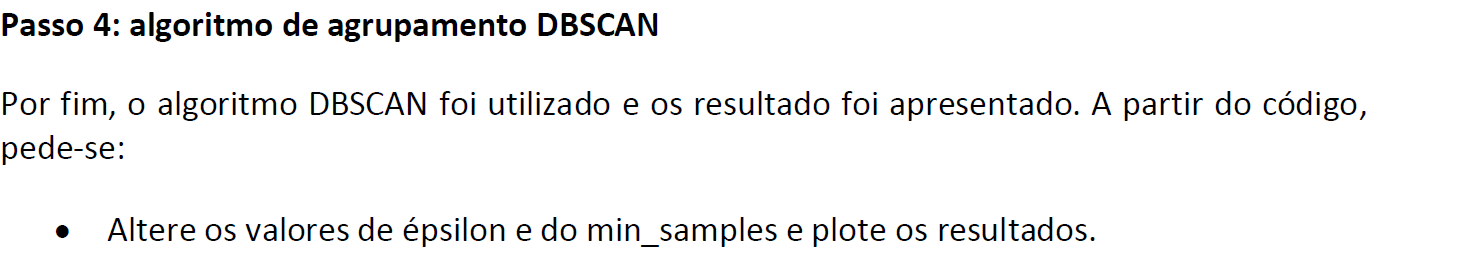

## DBscan Clustering


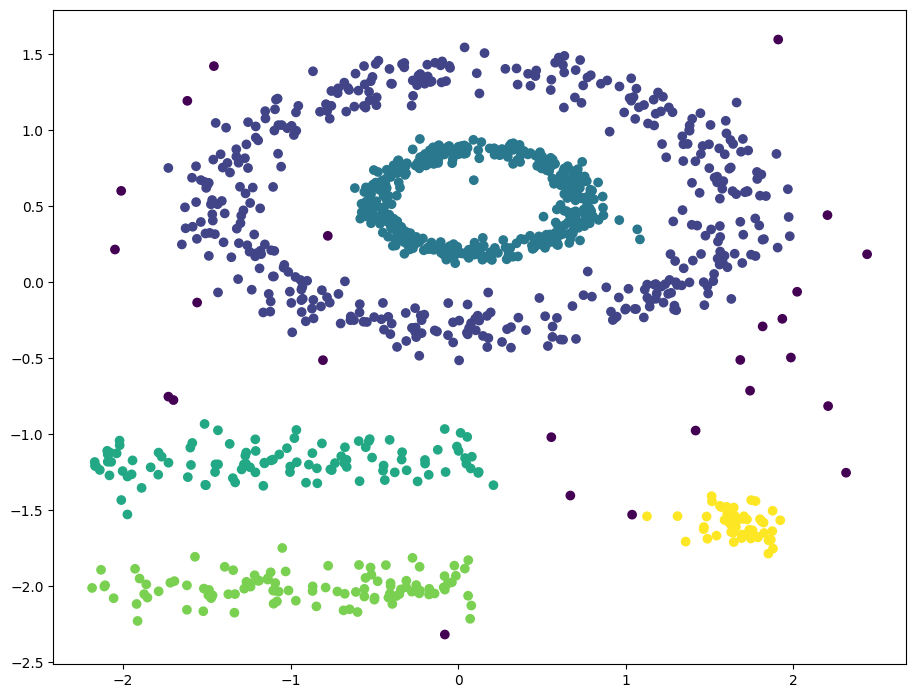

In [14]:
from sklearn.cluster import DBSCAN
plt.figure(figsize=(11,8.5))
fitted_dbscan = DBSCAN(eps=0.2).fit(scaled_df)
plt.scatter(scaled_df['x'],scaled_df['y'], c=fitted_dbscan.labels_);

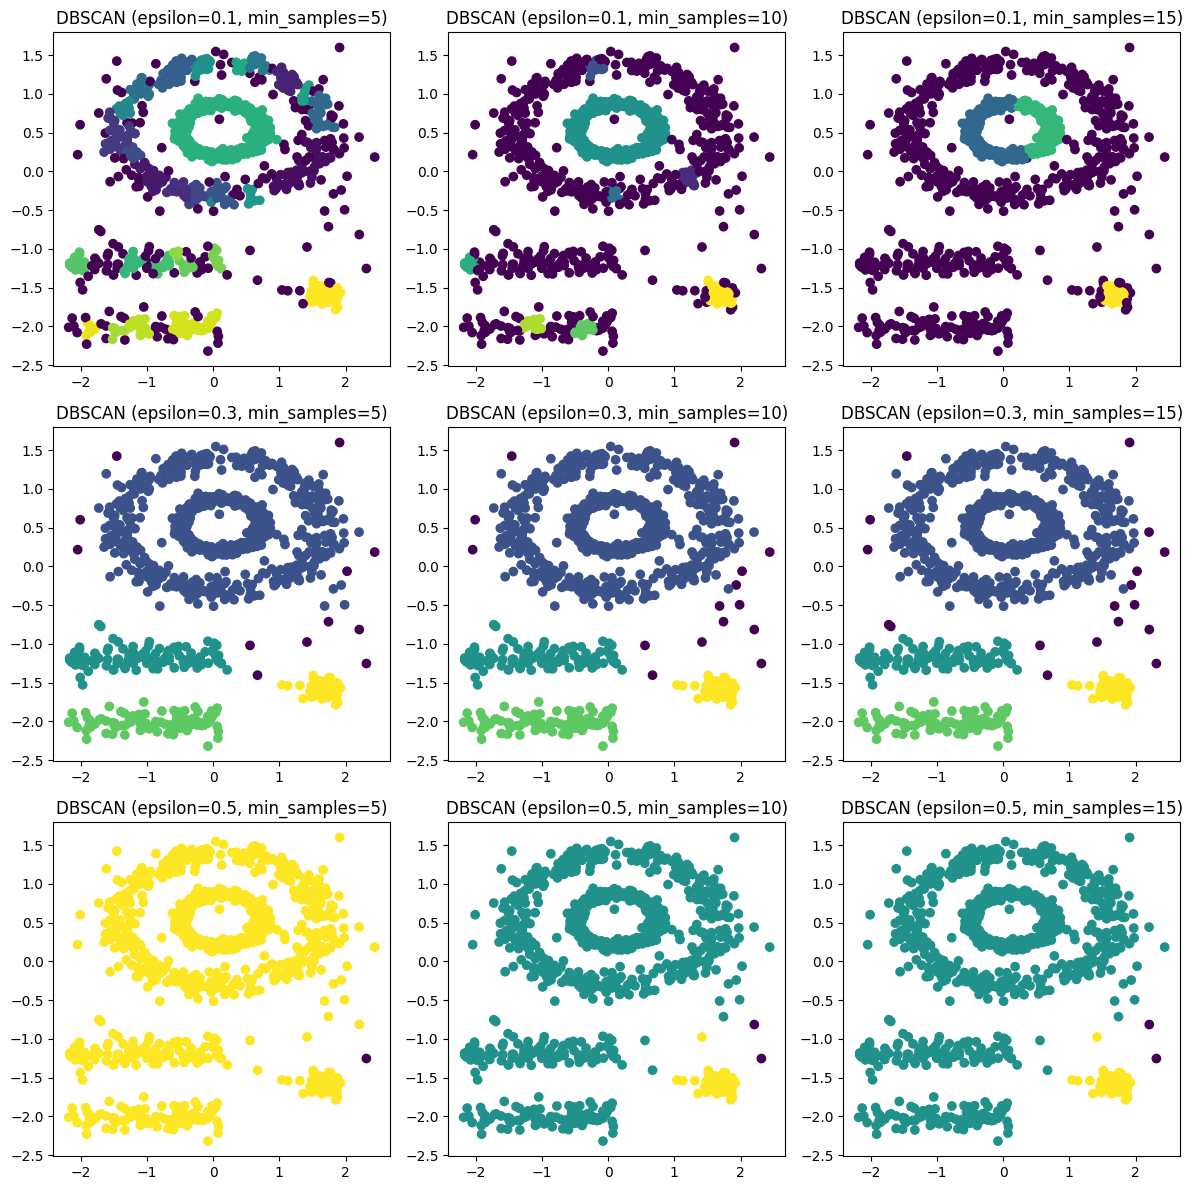

In [15]:
# Testar diferentes valores de epsilon e min_samples
epsilon_list = [0.1, 0.3, 0.5]
min_samples_list = [5, 10, 15]

fig, axs = plt.subplots(len(epsilon_list), len(min_samples_list), figsize=(12, 12))

for i, epsilon in enumerate(epsilon_list):
    for j, min_samples in enumerate(min_samples_list):
        # Criar o modelo DBSCAN
        clustering = DBSCAN(eps=epsilon, min_samples=min_samples)

        # Realizar o agrupamento
        clusters = clustering.fit_predict(scaled_df)

        # Plotar o gráfico de dispersão dos clusters
        axs[i, j].scatter(scaled_df['x'], scaled_df['y'], c=clusters, cmap='viridis')
        axs[i, j].set_title(f'DBSCAN (epsilon={epsilon}, min_samples={min_samples})')

plt.tight_layout()
plt.show()

### Características:
 - Pode agrupar relacionamentos não lineares muito bem; potencial para agrupamentos mais naturais e de formato arbitrário
 - Não requer a especificação do número de clusters (ou seja, ** k **); o algoritmo determina tal
 - Robusto para outliers
 - Muito sensível aos parâmetros (requer forte conhecimento dos dados)
 - Não garante que todos (ou QUALQUER) item será agrupado


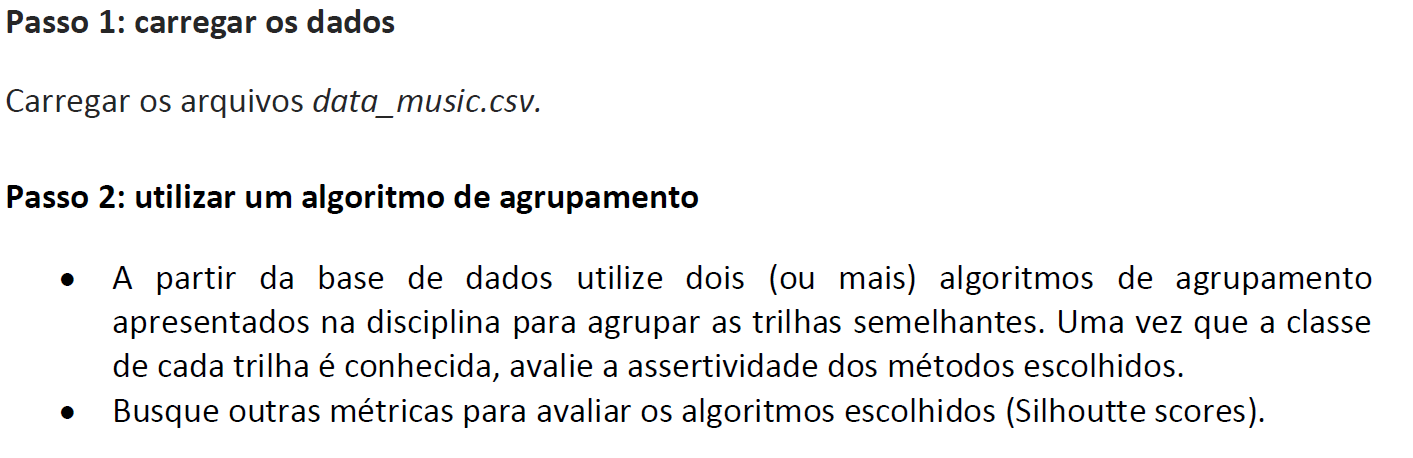

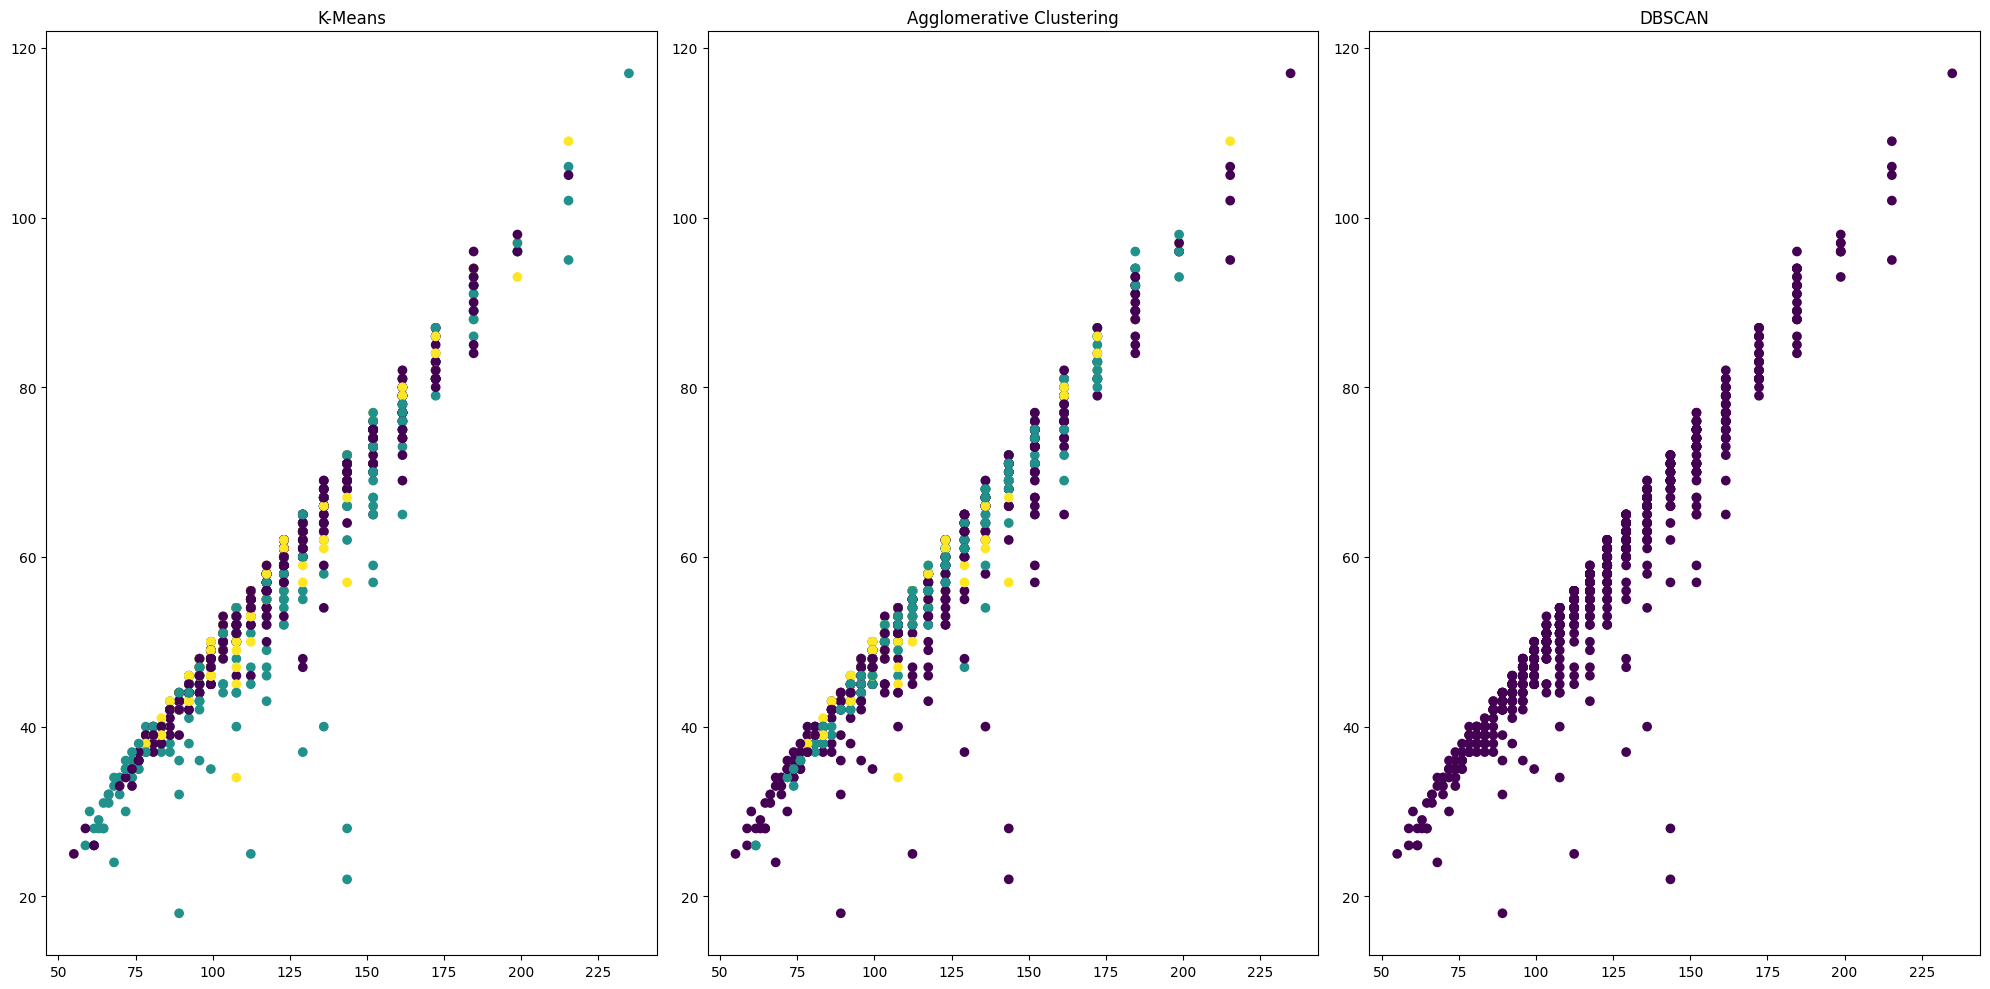

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Carregar o dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reconhecimentos Padrões/Lista-03/data_music.csv")

# Separar as features das trilhas
X = data.iloc[:, 1:-1]

# Classes conhecidas das trilhas
y_true = data["label"]

# Criar a figura com tamanho ajustável
fig = plt.figure(figsize=(20, 10))

# Aplicar o algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_score = adjusted_rand_score(y_true, kmeans_clusters)
kmeans_silhouette_score = silhouette_score(X, kmeans_clusters)

# Plotar o resultado do K-Means
plt.subplot(1, 3, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means')

# Aplicar o algoritmo Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(X)
agg_score = adjusted_rand_score(y_true, agg_clusters)
agg_silhouette_score = silhouette_score(X, agg_clusters)

# Plotar o resultado do Agglomerative Clustering
plt.subplot(1, 3, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg_clusters, cmap='viridis')
plt.title('Agglomerative Clustering')

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan_clusters = dbscan.fit_predict(X)
dbscan_score = adjusted_rand_score(y_true, dbscan_clusters)
dbscan_silhouette_score = 0.0 #Number of labels is 1. Valid values are 2

# Plotar o resultado do DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN')

plt.tight_layout()
plt.show()

In [17]:
# Avaliar a assertividade dos métodos via Adjusted Rand Score,
print("K-Means Adjusted Rand Score:", kmeans_score)
print("Agglomerative Clustering Adjusted Rand Score:", agg_score)
print("DBSCAN Adjusted Rand Score:", dbscan_score)

K-Means Adjusted Rand Score: 0.09445684628221929
Agglomerative Clustering Adjusted Rand Score: 0.08533311671612968
DBSCAN Adjusted Rand Score: 0.0


In [18]:
# Avaliar os resultados Silhouette Score
print("K-Means Silhouette Score:", kmeans_silhouette_score)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette_score)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

K-Means Silhouette Score: 0.540924695967618
Agglomerative Clustering Silhouette Score: 0.4967063255794423
DBSCAN Silhouette Score: 0.0
